In [101]:
%cd /home/michele/densmap/MobilityRW/WaterVapour/Production100fs
# %cd /home/michele/densmap/MobilityRW/WaterHexane/Production100fs
# %cd /home/michele/densmap/MobilityRW/WaterButanol/Production

/home/michele/densmap/MobilityRW/WaterVapour/Production100fs


In [102]:
%ls Flow

flow_00001.dat  flow_00601.dat  flow_01201.dat  flow_01801.dat  flow_02401.dat
flow_00002.dat  flow_00602.dat  flow_01202.dat  flow_01802.dat  flow_02402.dat
flow_00003.dat  flow_00603.dat  flow_01203.dat  flow_01803.dat  flow_02403.dat
flow_00004.dat  flow_00604.dat  flow_01204.dat  flow_01804.dat  flow_02404.dat
flow_00005.dat  flow_00605.dat  flow_01205.dat  flow_01805.dat  flow_02405.dat
flow_00006.dat  flow_00606.dat  flow_01206.dat  flow_01806.dat  flow_02406.dat
flow_00007.dat  flow_00607.dat  flow_01207.dat  flow_01807.dat  flow_02407.dat
flow_00008.dat  flow_00608.dat  flow_01208.dat  flow_01808.dat  flow_02408.dat
flow_00009.dat  flow_00609.dat  flow_01209.dat  flow_01809.dat  flow_02409.dat
flow_00010.dat  flow_00610.dat  flow_01210.dat  flow_01810.dat  flow_02410.dat
flow_00011.dat  flow_00611.dat  flow_01211.dat  flow_01811.dat  flow_02411.dat
flow_00012.dat  flow_00612.dat  flow_01212.dat  flow_01812.dat  flow_02412.dat
flow_00013.dat  flow_00613.dat  flow_01213.dat  flow

In [103]:
import numpy as np
import densmap as dm
import matplotlib.pyplot as plt

In [104]:
dt = 0.1
# WaterVapour
nx = 50
nz = 200
# WaterHexane
# nx = 25
# nz = 212
# WaterButanol
# nx = 22
# nz = 218
nframes = 3000
tag1 = 'SOL'
tag2 = 'HEX'
# tag2 = 'BUT'

In [105]:
# WaterVapour
lx = 9.95063
lz = 9.95063
# WaterHexane
# lx = 4.95022
# lz = 10.61313
# WaterButanol
# lx = 4.40000
# lz = 21.78292
dx = lx/nx
dz = lz/nz

In [106]:
x = np.linspace(0.0,lx,nx)+0.5*dx
z = np.linspace(0.0,lz,nz)+0.5*dz
t = dt*np.linspace(0,nframes-1,nframes)
jref = int(np.round(0.5*nz))
j0 = int(np.round(3.25/dz))
j1 = int(np.round(6.75/dz))
jdiff_list = []

In [107]:
prof_x = np.zeros(nx)
prof_z = np.zeros(nz)
prof_z1 = np.zeros(nz)
prof_z2 = np.zeros(nz)

In [108]:
""" WaterVapour """
for n in range(nframes) :
    fname = 'Flow/flow_'+str(n+1).zfill(5)+'.dat'
    rho = dm.read_density_file(fname, bin='y')
    prof_z_tmp = np.mean(rho,axis=0)
    zcom = np.sum(z*prof_z_tmp)/np.sum(prof_z_tmp)
    jcom = int(np.round(zcom/dz))
    jdiff = jref-jcom
    jdiff_list.append(jdiff)
    prof_z_tmp = np.roll(prof_z_tmp,jdiff)
    prof_z += prof_z_tmp
prof_z /= nframes
""" +++++++++++ """

' +++++++++++ '

In [109]:
""" WaterHexane """
"""
for n in range(nframes) :
    # SOL
    fname = 'Flow/flow_'+tag1+'_'+str(n+1).zfill(5)+'.dat'
    rho = dm.read_density_file(fname, bin='y')
    prof_z_tmp = np.mean(rho,axis=0)
    zcom = np.sum(z*prof_z_tmp)/np.sum(prof_z_tmp)
    jcom = int(np.round(zcom/dz))
    jdiff = jref-jcom
    jdiff_list.append(jdiff)
    prof_z_tmp = np.roll(prof_z_tmp,jdiff)
    prof_z1 += prof_z_tmp
    # HEX
    fname = 'Flow/flow_'+tag2+'_'+str(n+1).zfill(5)+'.dat'
    rho = dm.read_density_file(fname, bin='y')
    prof_z_tmp = np.mean(rho,axis=0)
    prof_z_tmp = np.roll(prof_z_tmp,jdiff)
    prof_z2 += prof_z_tmp
prof_z1 /= nframes
prof_z2 /= nframes
"""
""" +++++++++++ """

' +++++++++++ '

In [110]:
rho_ref = np.mean(prof_z[j0:j1])
rho_target = 0.5*rho_ref

<IPython.core.display.Javascript object>


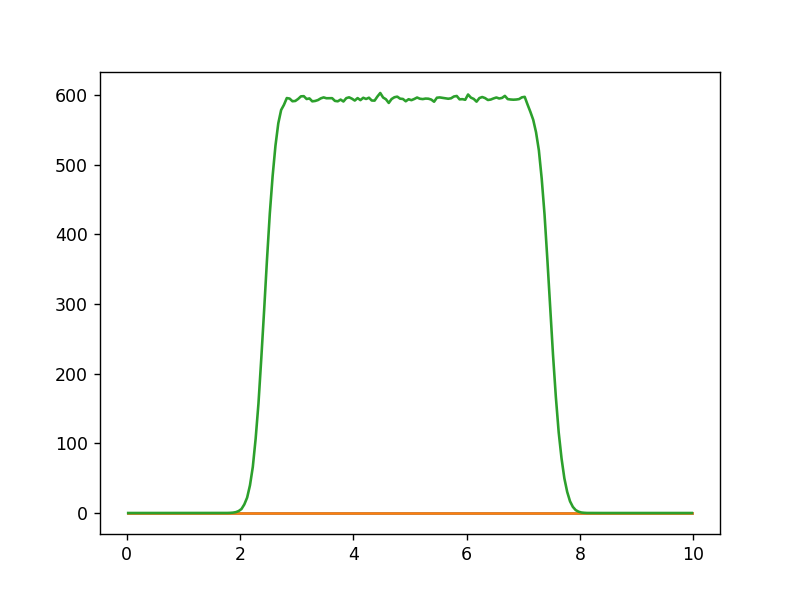

In [112]:
%matplotlib notebook
plt.plot(z,prof_z1)
plt.plot(z,prof_z2)
plt.plot(z,prof_z)

In [113]:
iblock = 5
nblock = nx//iblock
z_int_l = np.zeros((nframes,nblock))
z_int_r = np.zeros((nframes,nblock))

In [114]:
""" WaterVapour """
for n in range(nframes) :
    fname = 'Flow/flow_'+str(n+1).zfill(5)+'.dat'
    rho = dm.read_density_file(fname, bin='y')
    for ii in range(nblock) :
        prof_z_tmp = np.mean(rho[iblock*ii:(1+ii)*iblock,:],axis=0)
        prof_z_tmp = np.roll(prof_z_tmp,jdiff_list[n])
        for j in range(nz//2) :
            if prof_z_tmp[j] > rho_target :
                zil = ((prof_z_tmp[j]-rho_target)*z[j-1]+(rho_target-prof_z_tmp[j-1])*z[j])/(prof_z_tmp[j]-prof_z_tmp[j-1])
                break
        for j in range(nz-1,nz//2,-1) :
            if prof_z_tmp[j] > rho_target :
                zir = ((prof_z_tmp[j]-rho_target)*z[j+1]+(rho_target-prof_z_tmp[j+1])*z[j])/(prof_z_tmp[j]-prof_z_tmp[j+1])
                break
        z_int_l[n,ii] = zil
        z_int_r[n,ii] = zir
""" +++++++++++ """

' +++++++++++ '

In [115]:
""" WaterHexane """
"""
for n in range(nframes) :
    fname1 = 'Flow/flow_'+tag1+'_'+str(n+1).zfill(5)+'.dat'
    rho1 = dm.read_density_file(fname1, bin='y')
    fname2 = 'Flow/flow_'+tag2+'_'+str(n+1).zfill(5)+'.dat'
    rho2 = dm.read_density_file(fname2, bin='y')
    for ii in range(nblock) :
        prof_z_tmp1 = np.mean(rho1[iblock*ii:(1+ii)*iblock,:],axis=0)
        prof_z_tmp1 = np.roll(prof_z_tmp1,jdiff_list[n])
        prof_z_tmp2 = np.mean(rho2[iblock*ii:(1+ii)*iblock,:],axis=0)
        prof_z_tmp2 = np.roll(prof_z_tmp2,jdiff_list[n])
        prof_diff = prof_z_tmp1-prof_z_tmp2
        for j in range(nz//2) :
            if prof_diff[j]*prof_diff[j+1] < 0 :
                zil = (prof_diff[j]*z[j+1]-prof_diff[j+1]*z[j])/(prof_diff[j]-prof_diff[j+1])
                break
        for j in range(nz-1,nz//2,-1) :
            if prof_diff[j]*prof_diff[j-1] < 0 :
                zir = (prof_diff[j]*z[j-1]-prof_diff[j-1]*z[j])/(prof_diff[j]-prof_diff[j-1])
                break
        z_int_l[n,ii] = zil
        z_int_r[n,ii] = zir
"""
""" +++++++++++ """

' +++++++++++ '

In [116]:
nrav = 10
z_int_l = z_int_l.reshape(nframes//nrav,nrav*nblock,order='F')
z_int_r = z_int_r.reshape(nframes//nrav,nrav*nblock,order='F')

<IPython.core.display.Javascript object>


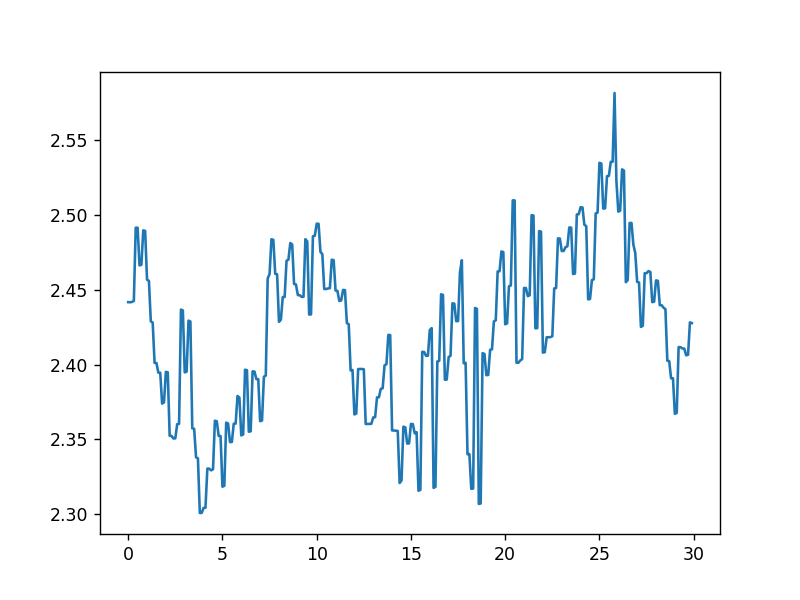

In [117]:
%matplotlib notebook
plt.plot(t[:len(z_int_l[:,0])],z_int_l[:,1])

In [118]:
z_diff_l = z_int_l-z_int_l[0,:]
z_diff_r = z_int_r[0,:]-z_int_r

<IPython.core.display.Javascript object>


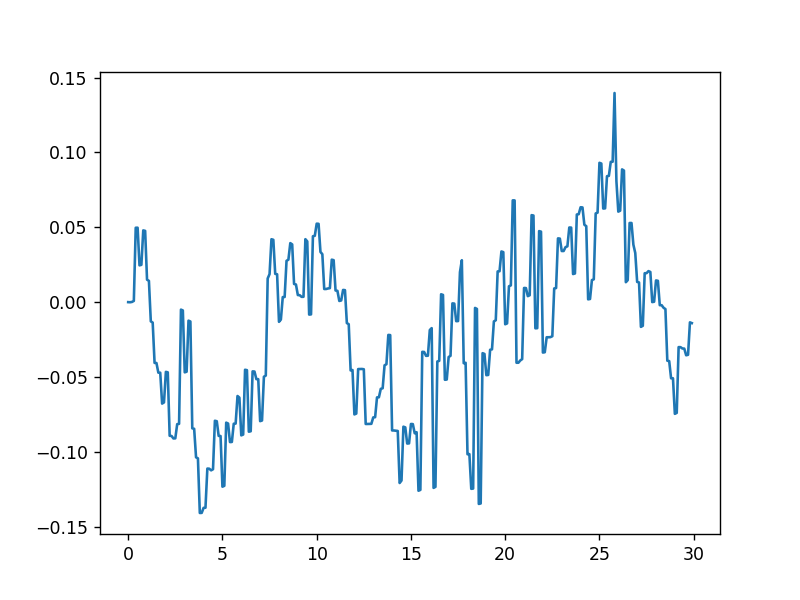

In [119]:
%matplotlib notebook
plt.plot(t[:len(z_diff_l[:,0])],z_diff_l[:,1])

In [120]:
z_diff_l2 = z_diff_l*z_diff_l
z_diff_r2 = z_diff_r*z_diff_r

In [121]:
z_diff_mean2 = 0.5*(np.mean(z_diff_l2,axis=1)+np.mean(z_diff_r2,axis=1))
# z_diff_mean2 = np.mean(z_diff_r2,axis=1)

In [122]:
t_block = t[:len(z_diff_mean2)]
w = 1/(t_block+1)
w = w/np.sum(w)
deg=2
p = np.polyfit(z_diff_mean2,t_block,w=w,deg=deg)
slope = 1/p[deg-1]

<IPython.core.display.Javascript object>


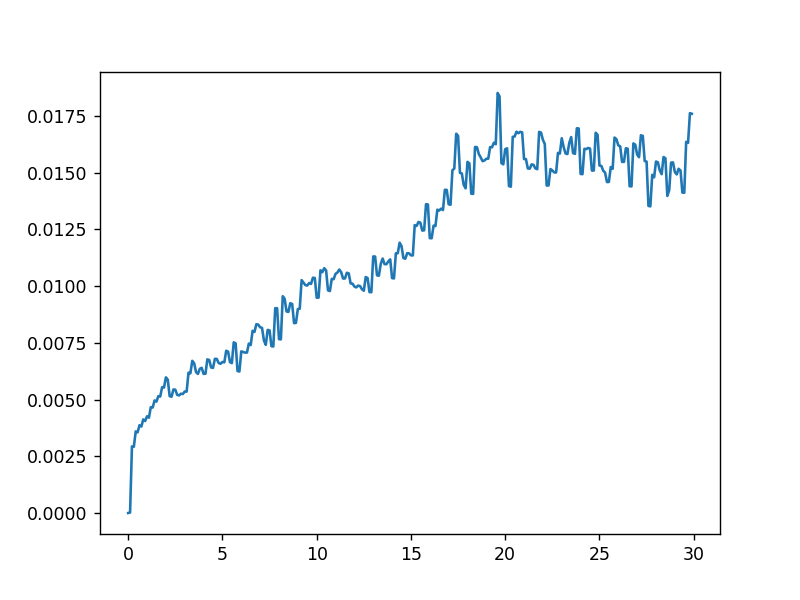

In [129]:
%matplotlib notebook
plt.plot(t_block,z_diff_mean2)
# plt.plot(np.polyval(p,z_diff_mean2),z_diff_mean2)
# plt.plot(t_block,slope*t_block)

<IPython.core.display.Javascript object>


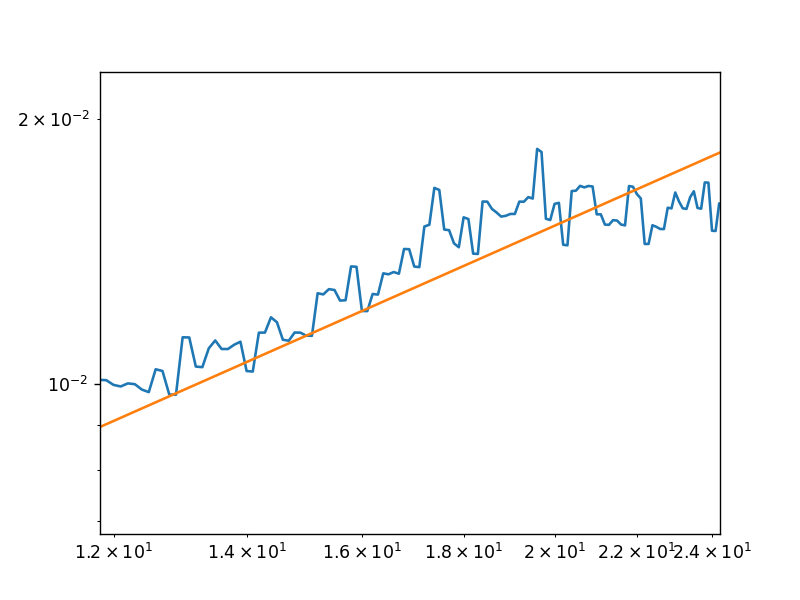

In [130]:
%matplotlib notebook
plt.loglog(t_block[1:],z_diff_mean2[1:])
plt.loglog(t_block[1:],(z_diff_mean2[-150]/t_block[-150])*t_block[1:])
plt.loglog(t_block[1:],(z_diff_mean2[1]/(t_block[1]**0.5))*t_block[1:]**0.5)
# plt.loglog(t_block[1:],(z_diff_mean2[1]/t_block[1])*t_block[1:])
# plt.loglog(t_block[1:],(z_diff_mean2[-1]/(t_block[-1]**0.5))*t_block[1:]**0.5)

In [91]:
log_t = np.log(t[1:len(z_diff_mean2)])
log_msd = np.log(z_diff_mean2[1:])

In [334]:
# np.polyfit(log_t,log_msd,deg=1)

array([ 0.62173641, -6.36239104])